# Workshop for her 2021.2 - Introdu√ß√£o √† Finan√ßas Quantitativas 

**Conte√∫dos**

0. Pandas
1. Importando dados hist√≥ricos
2. Retorno e risco
3. Sharpe Ratio
4. Teoria Moderna do Portf√≥lio

## 0. Pandas
Pandas √© uma biblioteca para manipula√ß√£o de dados estruturados, sendo fundamental para qualquer an√°lise de dados em Python. 


### Dados estruturados
Existem dois tipos principais de dados estruturados no pandas: Series (1 dimens√£o) e DataFrame (2 dimens√µes) 

- Series
    Um panda Series √© um array de uma dimens√£o, como por exemplo:
    
    cliente = pd.Series(["Fulano", "Ciclano", "Beltrano"])
    

- DataFrame
 √â uma tabela como a de uma planilha Excel, contendo colunas (columns) e linhas (rows). Um dataframe nada mais √© do que v√°rios pandas Series empilhados verticalmente. As colunas ser√£o indexadas pelo nome das vari√°veis (e.g. "Cliente") j√° as linhas em geral s√£o indexadas com n√∫meros inteiros (mas em certos casos tamb√©m usa-se strings). Desta forma, os valores da tabela podem ser acessadas tanto pela posi√ß√£o (i-√©sima linha, j-√©sima coluna), quando pela indexa√ß√£o (linha i, coluna "Cliente").

 ### Vantagens

Existem in√∫meras vantagens em se utilizar a biblioteca pandas, seja pela praticidade em se manipular tabelas, como tamb√©m pela rapidez das fun√ß√µes. Podemos citar a facilidade em:

- Tratamento de missing data
- Filtragem das informa√ß√µes da tabela mantendo a indexa√ß√£o original
- Acessar estat√≠sticas de uma ou m√∫ltiplas colunas 

Para mais informa√ß√µes sobre Pandas, recomendamos acessar a documenta√ß√£o oficial [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) (em ingl√™s). 


In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame({'Sim' : [50, 100],
             'N√£o': [10, 20]})

Sim  N√£o
0   50   10
1  100   20

In [ ]:
pd.DataFrame({'Vitoria': ['Gostei', 'N√£o gostei'],
             'Let√≠cia': ['Legal', 'N√£o gostei']})

Vitoria     Let√≠cia
0      Gostei       Legal
1  N√£o gostei  N√£o gostei

O `pd.DataFrame` gera objetos do tipo DataFrame. 

Para declararmos um DataFrame, utilizamos um dicion√°rio cujas chaves s√£o os nomes das colunas (ex: Bob e Sue) e os valores s√£o uma lista de entradas

In [ ]:
pd.DataFrame({'Vitoria': ['Gostei', 'N√£o gostei'],
             'Let√≠cia': ['Legal', 'N√£o gostei']},
            index = ['Produto A', 'Produto B'])

Vitoria     Let√≠cia
Produto A      Gostei       Legal
Produto B  N√£o gostei  N√£o gostei

Podemos acessar colunas espec√≠ficas com a seguinte sintaxe:

In [ ]:
dataframe = pd.DataFrame({'Vitoria': ['Gostei', 'N√£o gostei'],
             'Let√≠cia': ['Legal', 'N√£o gostei']},
            index = ['Produto A', 'Produto B'])

In [ ]:
dataframe.Vitoria

Produto A        Gostei
Produto B    N√£o gostei
Name: Vitoria, dtype: object

In [ ]:
dataframe['Vitoria']

Produto A        Gostei
Produto B    N√£o gostei
Name: Vitoria, dtype: object

Um panda Series √© uma sequ√™ncia de valores. Se o DataFrame √© uma tabela, uma Series √© uma lista

In [ ]:
pd.Series([1, 2, 3, 4, 5, 6])

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

## 1. Importando dados hist√≥ricos 
Existem v√°rios caminhos para obten√ß√£o dos dados de pre√ßos hist√≥ricos de ativos, como atrav√©s de sites de investimentos ou APIs. 
Podemos citar como exemplo as seguintes plataformas:
- Google Finance (Via panda_datareader)
- Yahoo Finace (Via panda_datareader ou yfinance)
- Quandl
- Alpha Vantage [(tutorial)](https://medium.com/turing-talks/an%C3%A1lise-de-uma-a%C3%A7%C3%A3o-em-python-b8114bce2fc) 
- Investing.com (investpy) 

A [investpy](https://investpy.readthedocs.io/) √© uma biblioteca gratuita em python que permite o acesso a dados, tanto recentes quanto hist√≥ricos, de qualquer produto indexado na plataforma investing.com, ou seja, com a biblioteca podemos acessar o pre√ßo hist√≥rico de a√ß√µes, fundos de investimentos, ETF's, dentre outros!

Aqui, vamos us√°-la para importar os DataFrames que queremos analisar.

In [ ]:
import investpy as inv

Primeiro, importamos os dados das a√ß√µes da Magalu nos √∫ltimos 3 anos:

In [ ]:
mglu = inv.get_stock_historical_data(stock='MGLU3',
                              country='Brazil',
                              from_date='01/01/2018',
                              to_date='01/01/2021')

In [ ]:
# Usamos o m√©todo .head() para ver as 5 primeiras linhas do dataframe
mglu.head()

Open  High   Low  Close    Volume Currency
Date                                                  
2018-01-02  2.50  2.54  2.42   2.45  59427200      BRL
2018-01-03  2.44  2.51  2.39   2.42  41385600      BRL
2018-01-04  2.47  2.49  2.45   2.48  47936000      BRL
2018-01-05  2.48  2.50  2.42   2.43  30684800      BRL
2018-01-08  2.42  2.47  2.42   2.43  28796800      BRL

In [ ]:
# E o m√©todo .tail() para ver as 5 √∫ltimas linhas do dataframe
mglu.tail()

Open   High    Low  Close    Volume Currency
Date                                                     
2020-12-22  25.26  25.39  24.82  25.13  25223000      BRL
2020-12-23  25.22  25.60  24.94  24.94  20558600      BRL
2020-12-28  24.75  25.30  24.37  25.22  23099100      BRL
2020-12-29  25.20  25.53  24.99  25.25  17789700      BRL
2020-12-30  25.37  25.66  24.95  24.95  19188700      BRL

Agora que conseguimos visualizar o dataframe, vamos entender o que cada coluna representa!
* *Open* √© o pre√ßo de abertura do ativo no dia de negocia√ß√£o
* *High* √© o pre√ßo mais alto do ativo no dia de negocia√ß√£o
* *Low* √© o pre√ßo mais baixo do ativo no dia de negocia√ß√£o
* *Close* √© o pre√ßo de fechamento do ativo no dia de negocia√ß√£o
* *Volume* √© o volume de negocia√ß√£o do ativo em Reais
* *Currency* √© a moeda local, nesse caso o Real


Comparando os dados de 2018 e final de 2020, percebemos que os pre√ßos das a√ß√µes da Magalu aumentaram em aproximadamente dez vezes nesse per√≠odo, o que demonstra uma valoriza√ß√£o geral da empresa no mercado.

Agora que obtivemos os dados de um ativo, como podemos montar e analisar uma carteira de investimentos com mais a√ß√µes?

Vamos montar uma carteira com 5 a√ß√µes e selecionar apenas os pre√ßos de fechamento (Close), abrigando-os em um novo dataframe.

In [ ]:
df = pd.DataFrame()

tickers = ['VALE3', 'ITUB4', 'ABEV3', 'PETR4']
for i in tickers:
    prices = inv.get_stock_historical_data(stock = i, country='Brazil', from_date='01/01/2018', to_date='01/01/2021')['Close']
    df[i] = prices

df['MGLU3'] = mglu['Close']

In [ ]:
df.head()

VALE3  ITUB4  ABEV3  PETR4  MGLU3
Date                                         
2018-01-02  40.10  23.99  21.00  15.88   2.45
2018-01-03  39.86  24.15  21.05  16.02   2.42
2018-01-04  40.02  24.66  20.94  16.05   2.48
2018-01-05  40.64  24.73  21.01  16.15   2.43
2018-01-08  41.55  24.65  20.98  16.34   2.43

Para visualizarmos rapidamente a evolu√ß√£o dos pre√ßos, podemos usar o m√©todo `.plot()` do pr√≥prio pandas

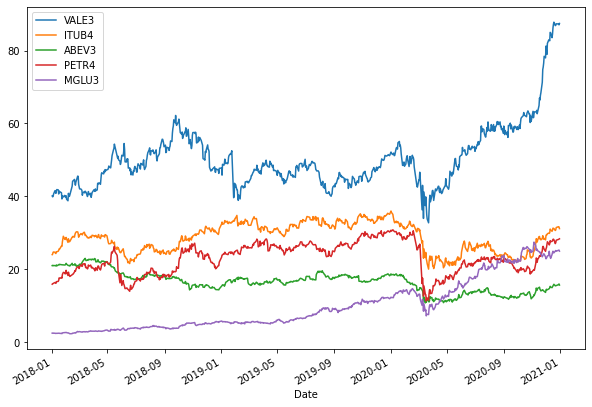

In [ ]:
df.plot(figsize=(10, 7));

Com esse gr√°fico, conseguimos ter uma boa no√ß√£o sobre a evolu√ß√£o dos pre√ßos de cada ativo da nossa carteira. Por√©m, para definir em quais ativos seria vantajoso investir, n√£o basta analisar os pre√ßos: precisamos entender quanto aquele investimento ir√° nos retornar ao longo do tempo. 

Ent√£o, partindo dos dados apresentados no dataframe, como podemos manipul√°-los para descobrir o *retorno* que cada a√ß√£o oferece?

## 2. Retorno e risco

Com os dados dos ativos em m√£os, para analis√°-los, precisamos entender dois conceitos importantes: Retorno e risco.
Primeiramente, importamos bibliotecas que precisaremos para fazer os c√°lculos dessa se√ß√£o.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


### 2.1. Retorno

#### Retorno simples

Come√ßamos pelo principal fator que motiva a realiza√ß√£o de um investimento: o retorno, ou seja, o quanto se ganhou com tal investimento.

Para calcul√°-lo, dever√≠amos considerar os dividendos (parcela do lucro de uma empresa distribu√≠da aos acionistas) pagos pela empresa ao longo do per√≠odo analisado. No entanto, n√£o possu√≠mos essa informa√ß√£o nos nossos dados. Por isso, consideraremos apenas o retorno advindo do aumento (ou queda) do pre√ßo da a√ß√£o, o que chamamos de **retorno simples**, calculado pela seguinte f√≥rmula:

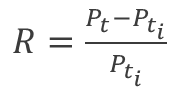

Sendo:

- *R*: retorno da a√ß√£o;
- *P_t*: pre√ßo da a√ß√£o no dia em que foi vendida (pre√ßo final);
- *P_ti*: pre√ßo da a√ß√£o no dia em que foi comprada (pre√ßo inicial).

Podemos fazer essa conta facilmente usando a fun√ß√£o  ``` pct_change()``` do pandas.



In [ ]:
df.pct_change().head()

VALE3     ITUB4     ABEV3     PETR4     MGLU3
Date                                                        
2018-01-02       NaN       NaN       NaN       NaN       NaN
2018-01-03 -0.005985  0.006669  0.002381  0.008816 -0.012245
2018-01-04  0.004014  0.021118 -0.005226  0.001873  0.024793
2018-01-05  0.015492  0.002839  0.003343  0.006231 -0.020161
2018-01-08  0.022392 -0.003235 -0.001428  0.011765  0.000000

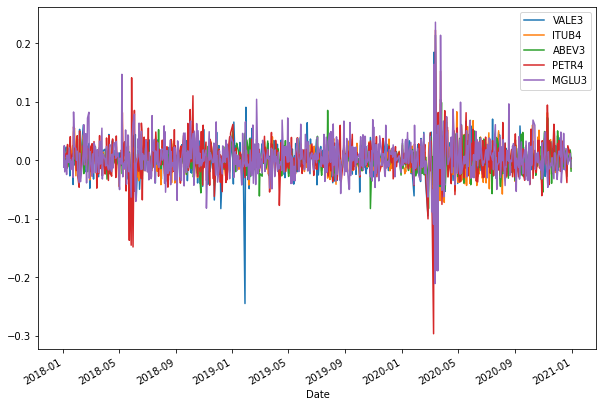

In [ ]:
df.pct_change().plot(figsize=(10, 7));

Agora sabemos como calcular o risco dos ativos individualmente, mas como calcular o retorno de um portf√≥lio com mais de um?

Para isso, √© preciso ponderar o retorno de cada ativo pelo seu respectivo peso. O peso de uma a√ß√£o √© o percentual de quanto ela representa do total da carteira. Assim, a soma desses pesos deve totalizar 1 (=100%).

Tomemos a nossa carteira de exemplo. Nela, temos 5 a√ß√µes (nessa ordem): VALE3, ITUB4, ABEV3, PETR4, MGLU3. Se todas as 5 a√ß√µes tiverem o mesmo peso, isso significa que temos 20% do nosso capital investido em cada uma delas e nosso vetor de pesos: w = [0.2, 0.2, 0.2, 0.2, 0.2]. 

Dessa forma, para obter o retorno simples do portf√≥lio em uma data, multiplicamos o retorno de cada ativo pelo seu peso e somamos os resultados. Matematicamente, isso √© dado pela seguinte f√≥rmula vetorial:

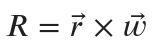

Onde ùëü‚Éó √© o vetor de retornos de cada ativo da carteira no per√≠odo, e ùë§‚Éó os seus respectivos pesos.

Obs: o resultado da multiplica√ß√£o do retorno de um ativo em uma data pelo seu peso na carteira √© denominado de attribution. Logo, o retorno do portf√≥lio em uma data √© a soma dos attributions de cada ativo, ou seja, suas contribui√ß√µes.

In [ ]:
r = df.pct_change() #retornos do ativo
w = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #pesos
R = np.dot(r, w) #retorno do portf√≥lio

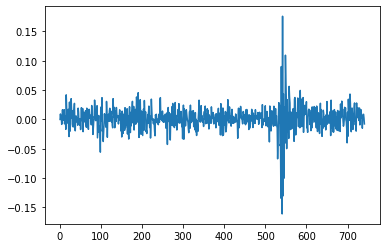

In [ ]:
plt.plot(R);

#### Retorno cumulativo


Vimos como calcular o retorno simples de um ativo para cada dia do per√≠odo em quest√£o. Mas, esse retorno dia a dia n√£o nos diz muito sobre o ganho do investidor ao final do per√≠odo. Para isso, podemos utilizar o retorno cumulativo simples, que √© dado pela f√≥rmula:

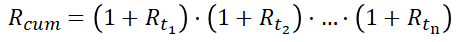

Sendo:

- *R_cum*: retorno simples cumulativo;
- *R_t1*: retorno simples do primeiro dia de investimento;
- *R_t2*: retorno simples do segundo dia de investimento;
- *R_n*: retorno simples do √∫ltimo dia.

Essa f√≥rmula pode parecer contra-intuitiva em um primeiro momento. Por que uma multiplica√ß√£o em vez de uma soma? 

Para entender isso, precisamos lembrar que cada retorno √© um percentual. Por exemplo, se voc√™ comprou uma a√ß√£o e ela valorizou 5% em um dia e, no dia seguinte, ela desvalorizou 2%, quanto ela valorizou (ou desvalorizou) ao todo considerando esse per√≠odo? A resposta n√£o √© simplesmente 3%, pois repare que ela desvalorizou 2% considerando a valoriza√ß√£o de 5% do dia anterior. Ou seja, ela diminuiu 2% do 105% do valor original. Assim, fazendo as contas, vemos que (1 + 5%)x(1 - 2%) = (1,05)x(0,98) =  1,029 = 102,9%. Ou seja, a a√ß√£o valorizou 2,9%.

In [ ]:
cum_return = np.cumprod(1 + df.pct_change()) - 1
cum_return.head()

VALE3     ITUB4     ABEV3     PETR4     MGLU3
Date                                                        
2018-01-02       NaN       NaN       NaN       NaN       NaN
2018-01-03 -0.005985  0.006669  0.002381  0.008816 -0.012245
2018-01-04 -0.001995  0.027928 -0.002857  0.010705  0.012245
2018-01-05  0.013466  0.030846  0.000476  0.017003 -0.008163
2018-01-08  0.036160  0.027511 -0.000952  0.028967 -0.008163

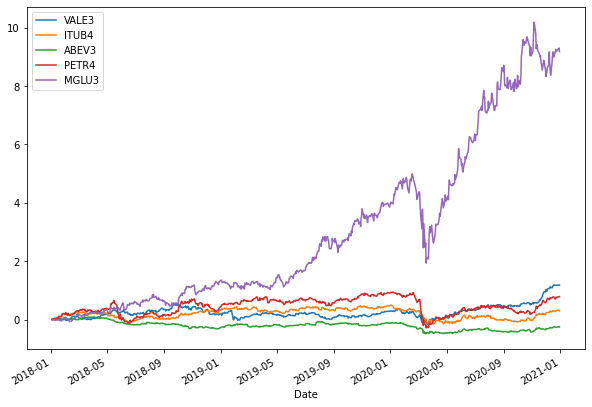

In [ ]:
cum_return.plot(figsize = (10,7));

In [ ]:
cum_return_portoflio = np.cumprod(1 + R[1:]) - 1

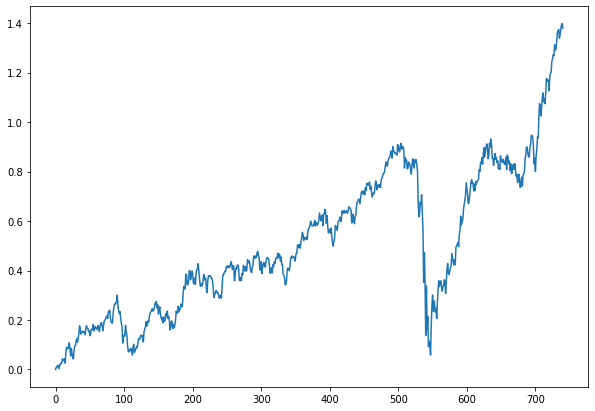

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(cum_return_portoflio);

### 2.2. Risco


Podemos calcular o retorno acumulado com os retornos simples do portfolio que t√≠nhamos calculado anteriormente.

Primeiramente, o que √© o risco no contexto de investimentos? De forma simples, podemos defini-lo como a probabilidade de insucesso do investimento. Mas da√≠ vem outra pergunta: como mensurar isso?

Como exemplo, observe o gr√°fico do retorno di√°rio das a√ß√µes da LATAM (LTM) e da Telef√¥nica (TEF) entre o final de 2018 e 2020:

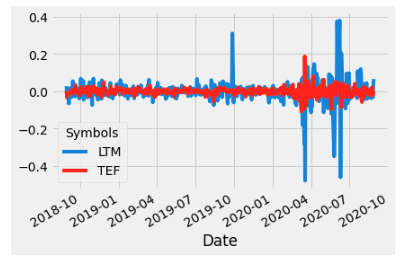

Note que o retorno da LATAM sofreu varia√ß√µes muito maiores do que da Telef√¥nica, isto √©, os retornos da Telef√¥nica ficaram pr√≥ximos da m√©dia, enquanto que o da LATAM n√£o. Isso quer dizer que a **volatilidade** da empresa a√©rea para um determinado per√≠odo de tempo foi maior do que da empresa de telefonia. Iremos ent√£o considerar essa volatilidade como o risco.


Para obter a volabilidade, calculamos o desvio padr√£o, cuja f√≥rmula √©:

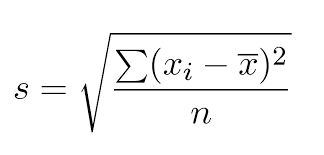

Sendo:

- x_i: retorno do dia;
- x_barra: m√©dia dos retornos;
- n: n√∫mero de retornos.

(x_i ‚Äî x_barra) mede o quanto o retorno no dia i diverge da m√©dia. Tomamos o quadrado dessa diferen√ßa para termos valores positivos (para uma diferen√ßa negativa n√£o 'cancelar' uma positiva), e ent√£o somamos elas. Tiramos a m√©dia ao dividir por n e, finalmente, desfazemos o efeito do ‚Äúelevar ao quadrado‚Äù ao tirar a raiz quadrada.

Podemos calcular o desvio padr√£o facilmente com o m√©todo ```.std()``` do pandas. Al√©m disso, multiplicaremos por 252 (dias √∫teis no ano) para obter o risco anual e n√£o di√°rio.



In [ ]:
df.std() * np.sqrt(252)

VALE3    140.214675
ITUB4     62.487419
ABEV3     45.272923
PETR4     67.717767
MGLU3    110.345384
dtype: float64

#### Risco de uma carteira

Intuitivamente pode se pensar que, para calcular o risco do portf√≥lio, basta calcular o desvio padr√£o de cada a√ß√£o e multiplicar pelo seu respectivo peso. Esse at√© poderia ser o caso se a flutua√ß√£o de cada uma das a√ß√µes fossem eventos independentes entre si. Mas esse difcilmente ser√° o caso, pois as a√ß√µes geralmente oscilam conjuntamente.

Assim, precisamos considerar n√£o somente as vari√¢ncias (quadrado do desvio padr√£o) das a√ß√µes, mas tamb√©m a correla√ß√£o de cada uma com as demais. Para isso, usamos a matriz de covari√¢ncia (C). As covari√¢ncias s√£o dadas por:

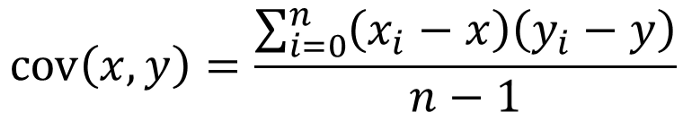

Sendo:

- *xi*: o retorno da a√ß√£o A no dia i;
- *x*: o retorno m√©dio da a√ß√£o A;
- *yi*: o retorno da a√ß√£o B no dia i;
- *y*: o retorno m√©dio da a√ß√£o B;
- *n*: o n√∫mero de dias analisados.

Note que, aplicando essa f√≥rmula a cada elemento da matriz de covari√¢ncia C, a diagonal principal apresentar√° uma caracter√≠stica interessante: nessa, ser√° calculada a covari√¢ncia entre a a√ß√£o e ela mesma, , observando a f√≥rmula, vemos que resulta na vari√¢ncia.

Por fim, ainda precisamos considerar os pesos das a√ß√µes. Assim, a volatilidade de um portf√≥lio √© dada por: 

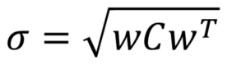

Sendo:

- *w*: array de dimens√£o (1 x n) com os pesos de cada a√ß√£o, sendo n o n√∫mero de a√ß√µes do portf√≥lio;
- *C*: matriz de covari√¢ncia (n x n) das a√ß√µes do portf√≥lio;
- *wT*: transposi√ß√£o do array com os pesos de cada a√ß√£o (n x 1).

In [ ]:
r = df.pct_change()

# m√©dia dos retornos anualizados 
mean_returns = r.mean() * 252

# matriz de covari√¢ncia 
covariance = np.cov(r[1:].T)

In [ ]:
vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

In [ ]:
vol

0.329888076500129

## 3. Sharpe Ratio 

Sharpe Ratio √© um √≠ndice de compara√ß√£o entre investimentos que leva em conta rentabilidade e risco, seguindo a f√≥rmula:   

$S = \frac{R-R_{f}}{\sigma}$

In [ ]:
risk_free = 0

In [ ]:
mean_returns = r.mean() * 252

In [ ]:
R = np.dot(mean_returns, w)

In [ ]:
sharpe = (R - risk_free) / vol

In [ ]:
sharpe

1.060625780914644

## 4. Teoria Moderna do Portf√≥lio de Harry Markowitz

Agora que j√° aprendemos o b√°sico sobre pre√ßos, retorno e risco, vamos usar esses conceitos para otimizar o nosso portf√≥lio.
Podemos definir uma otimiza√ß√£o de portf√≥lio como o processo utilizado para selecionarmos a melhor distribui√ß√£o de ativos em uma carteira a fim de atingirmos um _objetivo comum_.

**Objetivo**: Dado um certo n√≠vel de risco, vamos escolher o portf√≥lio que nos oferece o maior retorno

### 4.1. Simulando Portf√≥lios

In [ ]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
   
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = ...
    mean_returns = ...

    # matriz de covari√¢ncia 
    covariance = ...

    for i in range(num_portfolios):
        # gerando pesos aleat√≥rios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = ...

        # risco
        vol = np.sqrt(np.dot(..., np.dot(...))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (... - ...)/...

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

In [ ]:
wallets = generate_wallets(df)

Incialmente, vamos utilizar como m√©trica para selecionar o melhor portf√≥lio aquele que tiver o maior Sharpe Ratio:

In [ ]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

In [ ]:
best_portfolio(wallets)

array([9.02928744e-02, 1.17395769e-01, 4.22298079e-04, 1.19302254e-02,
       7.79958834e-01])

Vamos comparar os retornos com o nosso portf√≥lio anterior:

In [ ]:
new_weights = np.array(best_portfolio(wallets))

In [ ]:
new_portfolio = np.dot(r, new_weights)
new_cum_returns = np.cumprod(1 + new_portfolio[1:]) - 1

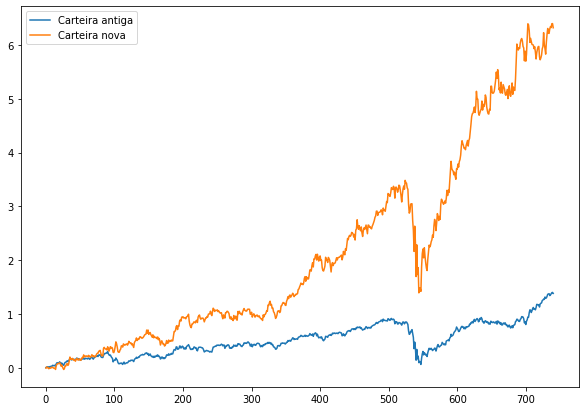

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(cum_return_portoflio, label = 'Carteira antiga')
plt.plot(new_cum_returns, label = 'Carteira nova')
plt.legend();

In [ ]:
cum_return_portoflio[-1] 

1.3796066319610438

In [ ]:
new_cum_returns[-1] 

6.320279076048592

Como j√° conversamos anteriormente, n√£o basta apenas olhar para o retorno dos investimentos (apesar do nosso ganho ser bem expressivo com a nova carteira). Vamos olhar tamb√©m para outras m√©tricas:

### Volatilidade

In [ ]:
new_vol = np.sqrt(np.dot(new_weights.T, np.dot(covariance, new_weights))) * np.sqrt(252)

In [ ]:
print(f'Volatilidade - Carteira antiga: {vol}')
print(f'Volatilidade - Carteira nova: {new_vol}')

Volatilidade - Carteira antiga: 0.329888076500129
Volatilidade - Carteira nova: 0.4656476655385215


### Sharpe Ratio

In [ ]:
def sharpe_ratio(returns, weights, volatility, risk_free = 0):
    
    mean_returns = returns.mean() * 252
    
    R = np.dot(mean_returns, weights)
    
    sharpe = (R - risk_free) / volatility
    
    return sharpe

In [ ]:
print(f'Sharpe Ratio - Carteira antiga: {sharpe_ratio(r, w, vol)}')
print(f'Sharpe Ratio - Carteira nova:   {sharpe_ratio(r, new_weights, new_vol)}')

Sharpe Ratio - Carteira antiga: 1.060625780914644
Sharpe Ratio - Carteira nova:   1.6878641001632226


### 4.2. A fronteira eficiente
- A fronteira eficiente nada mais √© do que a linha que representa os retornos m√°ximos que podemos obter com um portf√≥lio dado um certo n√≠vel de risco. 
- Portf√≥lios √≥timos sempre devem estar na linha da fronteira, pois, para qualquer portf√≥lio abaixo da linha, h√° uma carteira dispon√≠vel com o mesmo risco associado, por√©m com um retorno maior

In [ ]:
def plot_efficient_frontier(wallets):
    
    vol = wallets['vol']
    returns = ...
    sharpe = ...

    indice = np.array(sharpe).argmax()
    y_axis = ...[indice]
    X_axis = ...[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.colorbar(label = 'Sharpe Ratio')
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

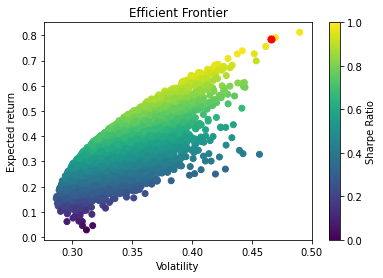

In [ ]:
plot_efficient_frontier(wallets)

### 4.3. Afinal, o que √© um portf√≥lio eficiente?

In [ ]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(...).argmax()

    elif method == 'volatility':

        indice = np.array(...).argmin()

    elif method == 'return':

        indice = np.array(...).argmax()

    return weights[indice]

In [ ]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(...).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(...).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(...).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()